***Aim:***

Optimize the power consumption of Zone 1 based on various environmental and meteorological factors in  Wellington, New-Zealand.


***Problem Statement:***

The objective is to develop a machine learning model that can predict the power consumption (Zone 1 Power Consumption) of Wellington, New Zealand based on various environmental and meteorological factors. The goal is to create an accurate predictive model that can assist in managing energy resources efficiently and optimizing power consumption in that zone.


***Data Dictionary:***


- **Date Time:** Consumption dates
- **Temperature:** The temperature in Celsius at the specific location.
- **Humidity:** The relative humidity percentage at the location. (g.m-3, i.e. units of grams of water vapor per cubic meter of air. )
- **Wind Speed:** The speed of the wind at the location. (nautical mile per hour )
- **General Diffuse Flows:** `Refer` to a specific measurement or calculation related to the amount or intensity of diffuse solar radiation in a particular area. (Mtr sqr per sec )
- **Diffuse Flows:** The measure of diffuse solar radiation. (Mtr sqr per sec )
- **Zone 1 Power Consumption:** The power consumption in the specific zone, which is the target variable to be predicted. (in KWR- Target value)
***
***



### ***Essential libraries for Machine Learning:***
***

In [1]:

import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px  

#view all columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings("ignore")


***
### ***Loading and inspecting the dataset:***
***

In [2]:

data = pd.read_csv('../data/Energy-Consumption.csv')



#### ***Initial Data Inspection***


In [3]:

data.head()


,Unnamed: 0,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [4]:

print(f"Tha Dataset Contains {data.shape[0]} rows, and {data.shape[1]} Columns.")


Tha Dataset Contains 52416 rows, and 8 Columns.


In [5]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                52416 non-null  int64  
 1   DateTime                  52416 non-null  object 
 2   Temperature               52416 non-null  float64
 3   Humidity                  52416 non-null  float64
 4   Wind Speed                52416 non-null  float64
 5   general diffuse flows     52416 non-null  float64
 6   diffuse flows             52416 non-null  float64
 7   Zone 1 Power Consumption  52416 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB


In [6]:

data.describe()


,Unnamed: 0,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,26207.500000,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564
std,15131.340192,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564
min,0.000000,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200
25%,13103.750000,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692
50%,26207.500000,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340
75%,39311.250000,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185
max,52415.000000,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120


***Insights:***
- The average temperature of Wellington, New-Zealand City is 18.8 degree celsius and the maximum temperature goes upto 52 degree celsius. 75% of the times the temperature lies below 39 degree celsius that shows the temperature of the city reaches max temperature of 52 degrees rarely
- The average Humidity of the city is 68.25.
- The average wind speed of the city is 1.9 miles/hour.
- The average Zone 1 Power Consumption of the city is 32344 MW


In [7]:

data.drop(columns='Unnamed: 0', inplace=True)


***hourly consumption data***

In [8]:

data = data.iloc[lambda x:x.index%6==0] 
data


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,01-01-2017 00:00,6.559,73.80,0.083,0.051,0.119,34055.69620
6,01-01-2017 01:00,5.641,77.70,0.080,0.048,0.096,25998.98734
12,01-01-2017 02:00,5.059,78.60,0.081,0.070,0.096,23003.54430
18,01-01-2017 03:00,5.169,77.90,0.083,0.066,0.108,21107.84810
24,01-01-2017 04:00,4.753,75.70,0.083,0.044,0.134,20524.55696
...,...,...,...,...,...,...,...
52386,12/30/2017 19:00,9.920,61.15,0.073,0.062,0.096,37694.29658
52392,12/30/2017 20:00,9.020,63.38,0.075,0.048,0.130,37146.76806
52398,12/30/2017 21:00,8.800,65.49,0.082,0.088,0.115,36343.72624
52404,12/30/2017 22:00,8.090,68.49,0.079,0.070,0.085,34920.15209


***converting the DataTime column to datetime datatype***

In [9]:

data['DateTime'] = pd.to_datetime(data.pop('DateTime'),format='mixed')
data


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,DateTime
0,6.559,73.80,0.083,0.051,0.119,34055.69620,2017-01-01 00:00:00
6,5.641,77.70,0.080,0.048,0.096,25998.98734,2017-01-01 01:00:00
12,5.059,78.60,0.081,0.070,0.096,23003.54430,2017-01-01 02:00:00
18,5.169,77.90,0.083,0.066,0.108,21107.84810,2017-01-01 03:00:00
24,4.753,75.70,0.083,0.044,0.134,20524.55696,2017-01-01 04:00:00
...,...,...,...,...,...,...,...
52386,9.920,61.15,0.073,0.062,0.096,37694.29658,2017-12-30 19:00:00
52392,9.020,63.38,0.075,0.048,0.130,37146.76806,2017-12-30 20:00:00
52398,8.800,65.49,0.082,0.088,0.115,36343.72624,2017-12-30 21:00:00
52404,8.090,68.49,0.079,0.070,0.085,34920.15209,2017-12-30 22:00:00


***I am setting the Datatime column as index for ease of plotting and slicing and shifting operations***

In [10]:

data.set_index('DateTime',inplace=True)
data


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
DateTime,,,,,,
2017-01-01 00:00:00,6.559,73.80,0.083,0.051,0.119,34055.69620
2017-01-01 01:00:00,5.641,77.70,0.080,0.048,0.096,25998.98734
2017-01-01 02:00:00,5.059,78.60,0.081,0.070,0.096,23003.54430
2017-01-01 03:00:00,5.169,77.90,0.083,0.066,0.108,21107.84810
2017-01-01 04:00:00,4.753,75.70,0.083,0.044,0.134,20524.55696
...,...,...,...,...,...,...
2017-12-30 19:00:00,9.920,61.15,0.073,0.062,0.096,37694.29658
2017-12-30 20:00:00,9.020,63.38,0.075,0.048,0.130,37146.76806
2017-12-30 21:00:00,8.800,65.49,0.082,0.088,0.115,36343.72624


***
### ***Data Preprocessing***
***

***Missing Values***

In [11]:

missing_values = data.isnull().sum()  
print("Missing Values in Each Column:\n")
print(missing_values)


Missing Values in Each Column:

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 1 Power Consumption    0
dtype: int64


In [12]:

duplicate_count = data.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 0


***
### ***Data Exploration and Analysis:***
***

In [13]:

plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = [16, 6]

plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['text.color'] = '#fff'  # Dark gray for better contrast
plt.rcParams['font.sans-serif'] = 'Times New Roman'

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.edgecolor'] = '#333333'  # Darker border for better visibility

plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = '#fff'  # Light gray grid lines

sns.set_palette('muted')


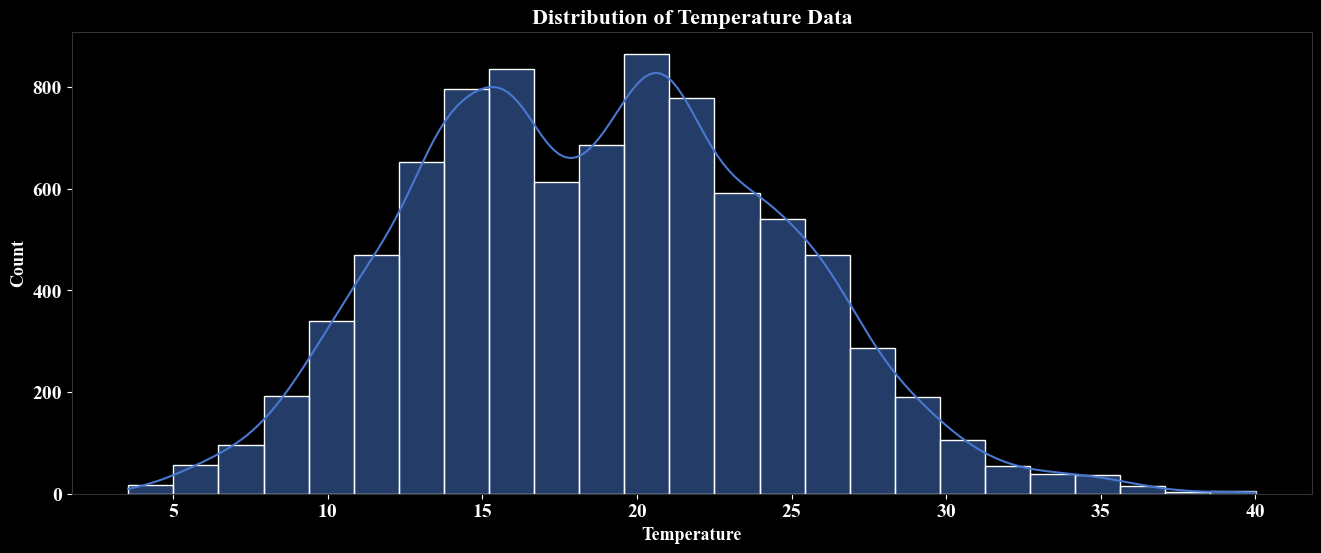

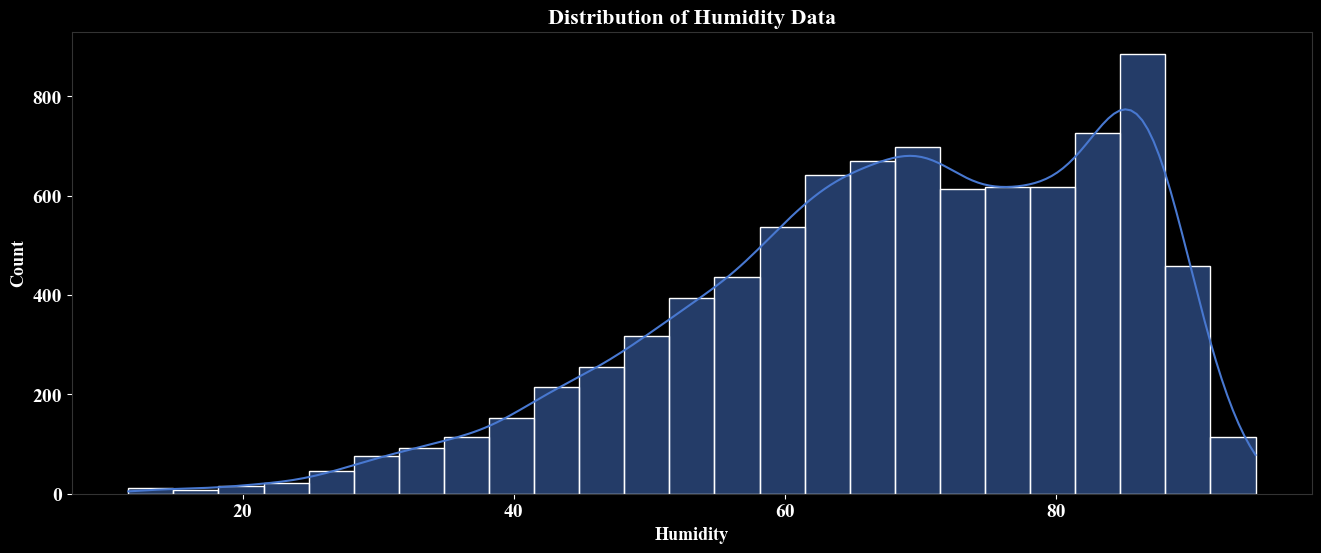

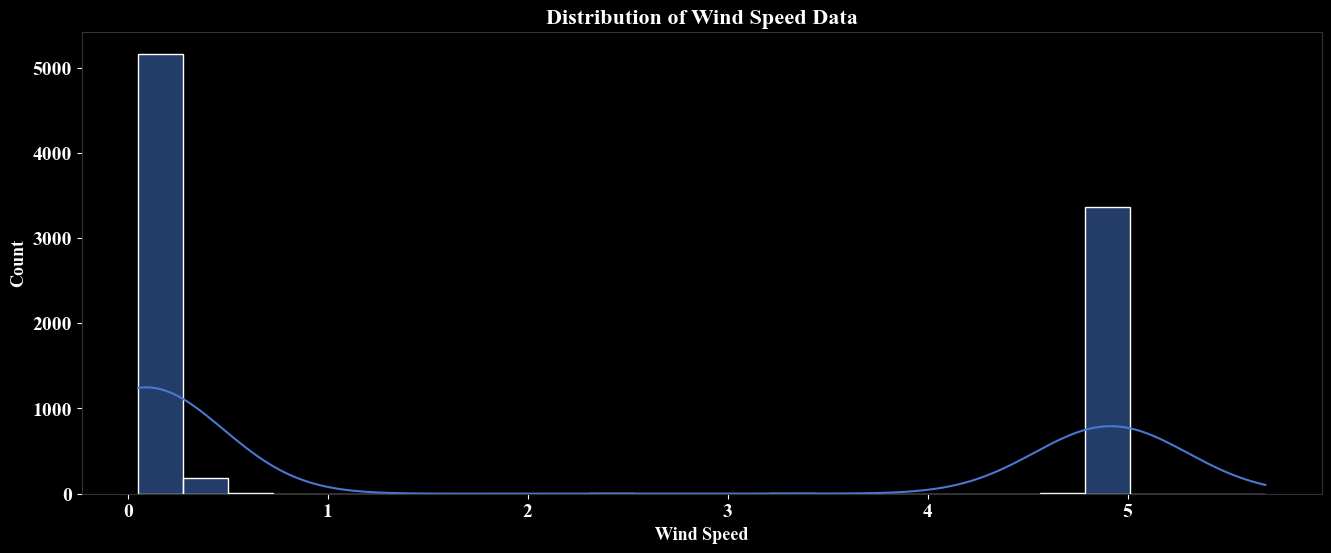

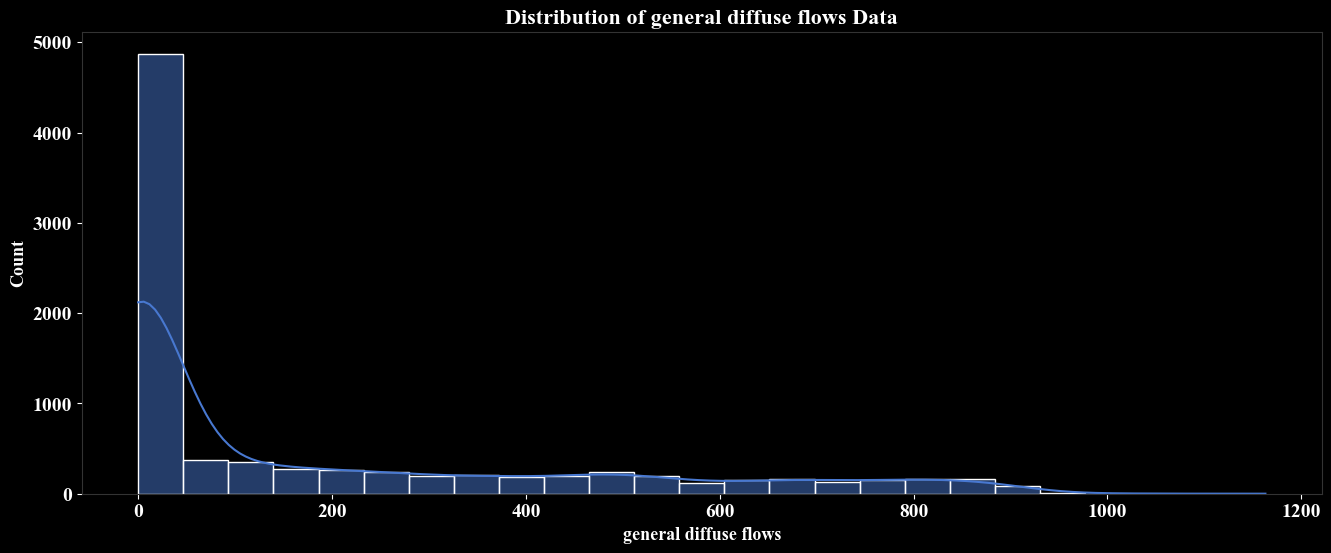

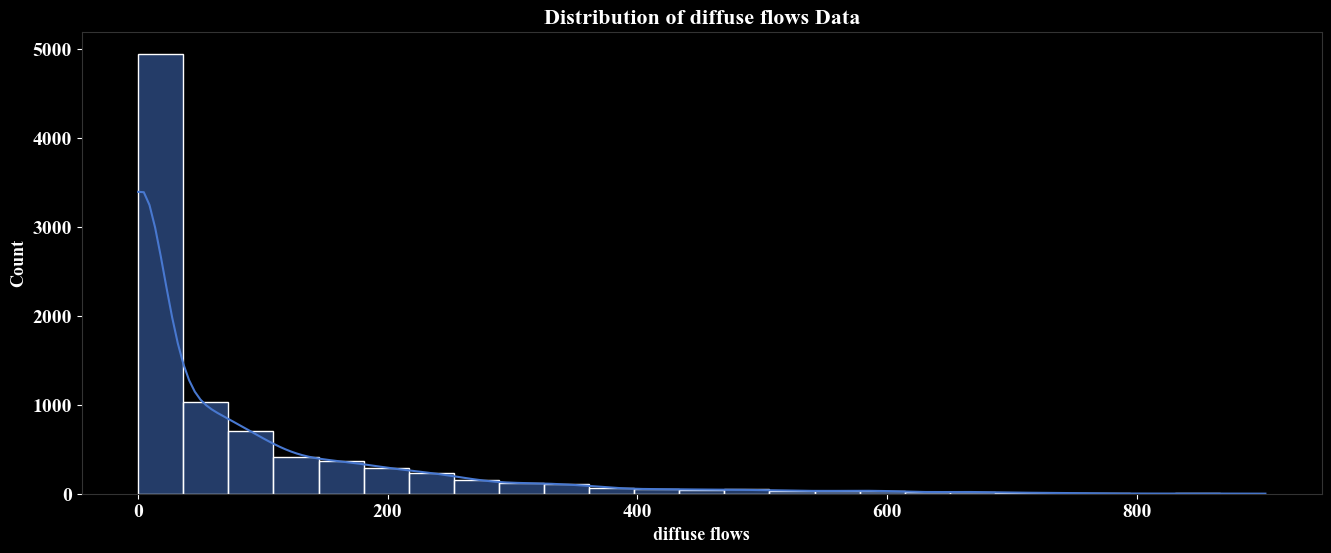

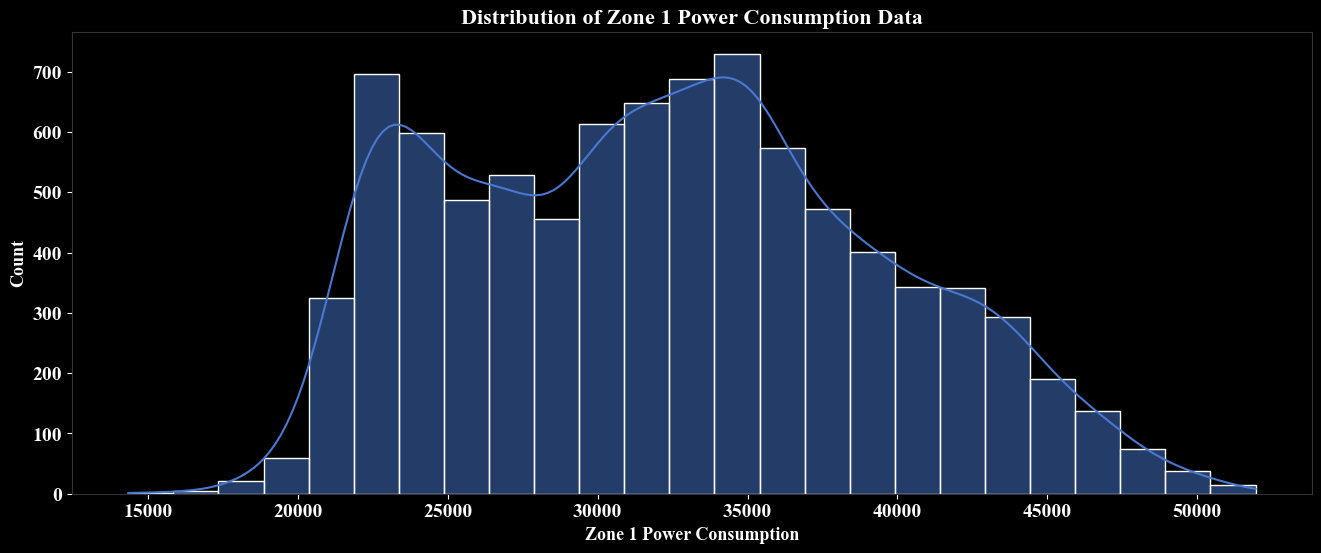

In [14]:

for i in data.columns:
    sns.histplot(data = data, x = i, bins = 25, kde = True)
    plt.title(F'Distribution of {i} Data')
    plt.show()
    

***`Insights (temperature):`***
- The distribution of the temperature data follows a Bimodal distribution.
    - The bimodal distribution suggests that there are two common temperature ranges or modes. This could indicate:
       - **Day and Night Temperature Differences:** One peak might represent daytime temperatures, while the other represents nighttime temperatures.
       - **Seasonal Variations:** The peaks could correspond to distinct seasons, such as a hot season and a cooler season.
       - **Microclimates:** The data might be collected from an area with different microclimates, where some locations experience consistently higher temperatures than others.

$-$

***`Insights (humidity):`***
- **Skewed Distribution:** The humidity data is indeed skewed to the left, which means that the majority of the data points are clustered towards the higher end of the humidity scale. This confirms that Wellington and New-Zealand generally experiences high humidity levels.
- **Typical Humidity Range:** We correctly pointed out that the humidity level in city is mostly between 80 to 95. This aligns with the peak observed in the distribution and reflects the influence of the monsoon season.

$-$

***`Insights (Wind Speeds):`***
- ***Predominant Wind Speeds:*** We correctly identified that the wind speed in Wellington and New-Zealand is mostly concentrated in two ranges:n0-1 mph and 4.5-5.5 mph. This highlights the bimodal nature of the distribution and the prevalence of both calm conditions and moderate wind speeds.

$-$

***`Insights (diffuse flows):`***

- **Highly Skewed Distribution:** The distribution of diffuse flows is extremely skewed to the right. This indicates that most of the data points are clustered at the lower end of the diffuse flows range.
- **Predominance of Low Diffuse Flows:** A very high frequency of diffuse flows is observed at or near zero, suggesting that low diffuse flow values are overwhelmingly common.
- **Rare High Diffuse Flows:** Higher diffuse flow values are rare, as evidenced by the rapidly decreasing frequency as the diffuse flows increase.
- **Diffuse Flows are Mostly Low:** The data suggests that diffuse flows in the area represented are predominantly low.

$-$

***`Insights (Power consumption in a zone):`***

- **Bimodal Distribution:** The power consumption in Zone A exhibits a bimodal distribution, indicating two distinct periods or modes of higher power usage.
- **Two Primary Consumption Peaks:** The data shows two primary peaks, one around 20,000 units and another around 35,000 units of power consumption.
- **Distinct Low Consumption Period:** There is a noticeable valley between the two peaks, suggesting a period of significantly lower power consumption.
- **Variability in Consumption:** There is a spread of data around each peak, indicating variability in power consumption within each mode.

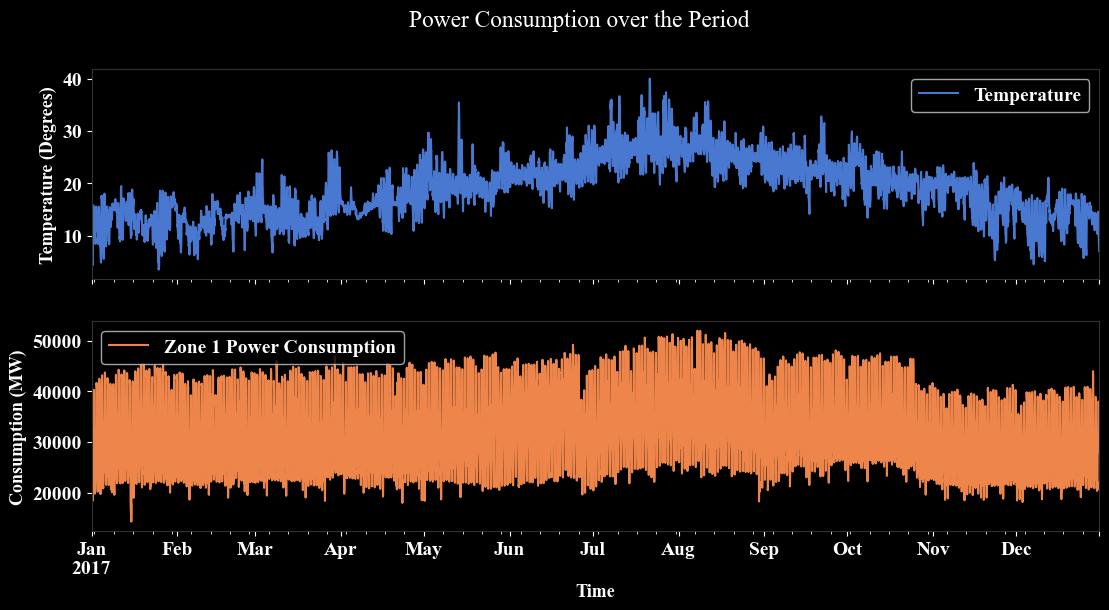

In [15]:

ax0, ax1 = data[['Temperature', 'Zone 1 Power Consumption']].plot(figsize=(13, 6), subplots=True)
ax0.set_ylabel('Temperature (Degrees)')
ax1.set_ylabel('Consumption (MW)')
plt.xlabel('Time')  
plt.suptitle('Power Consumption over the Period')
plt.show()


***Insights:***
- From the above plots, we can see that power consumption increases when the temperature rises. The highest temperature occurs around the middle of the period, and power consumption is also at its peak during this time. This suggests that people might be using air conditioners and cooling systems more frequently, leading to higher electricity usage. The fluctuations in power consumption could be due to daily usage patterns and industrial demand.


***
### ***Feature Engineering***
***

In [16]:

data.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption'],
      dtype='object')

$-$    
#### ***The aim of this project is to forecasting time series data.***
*The models I am planning to use are **Prophet** and **LSTM**. It only requires a datetime feature and a target column. Hence, we can drop other columns and keep datetime and Power Consumption feature alone.*

In [17]:

data.reset_index(inplace=True)
new_data = data[['DateTime','Zone 1 Power Consumption']] 


In [18]:

new_data.to_csv("../data/feature_and_target_data.csv", index = False)
